In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('maslo.csv')

In [3]:
print(data.head())

   CSU_ID ITEM_NAME  YEAR  MONTH  CSU_AVG_PRICE  ROHLIK_AVG_PRICE  \
0  115101    Máslo   2020      1         170.14        294.485226   
1  115101    Máslo   2020      2         165.67        274.827594   
2  115101    Máslo   2020      3         167.56        282.438610   
3  115101    Máslo   2020      4         159.72        288.112619   
4  115101    Máslo   2020      5         151.52        285.307624   

   KOSIK_AVG_PRICE  ITESCO_AVG_PRICE  ROHLIK_DIFF_FROM_CSU  \
0       276.306700        244.830242           -124.345226   
1       276.721961        238.029167           -109.157594   
2       276.728205        238.394758           -114.878610   
3       272.837246        235.145833           -128.392619   
4       262.098102        232.495851           -133.787624   

   KOSIK_DIFF_FROM_CSU  ITESCO_DIFF_FROM_CSU  ROHLIK_MIN_PRICE  \
0          -106.166700            -74.690242             199.6   
1          -111.051961            -72.359167             179.6   
2          -10

In [4]:
data = data[['YEAR', 'MONTH', 'CSU_AVG_PRICE']]

In [5]:
print(data.head())

   YEAR  MONTH  CSU_AVG_PRICE
0  2020      1         170.14
1  2020      2         165.67
2  2020      3         167.56
3  2020      4         159.72
4  2020      5         151.52


In [6]:
data['YEAR_MONTH'] = data.YEAR.astype(str) + '/' + data.MONTH.astype(str)

In [7]:
print(data.head())

   YEAR  MONTH  CSU_AVG_PRICE YEAR_MONTH
0  2020      1         170.14     2020/1
1  2020      2         165.67     2020/2
2  2020      3         167.56     2020/3
3  2020      4         159.72     2020/4
4  2020      5         151.52     2020/5


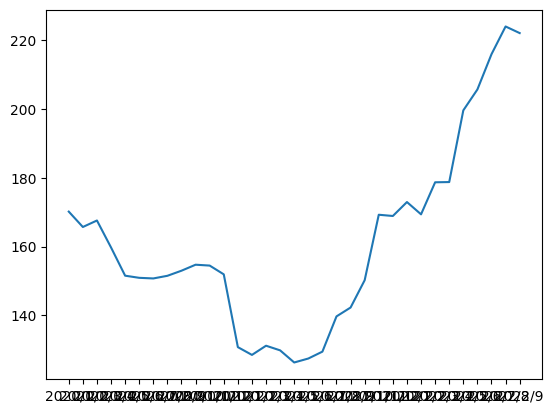

In [9]:
plt.plot(data['YEAR_MONTH'], data['CSU_AVG_PRICE'])
plt.show()

In [10]:
from sklearn import linear_model
X_train = data[['YEAR', 'MONTH']]
y_train = data[['CSU_AVG_PRICE']]

In [11]:
# Define the model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Generate forecast
d = {'YEAR': [2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], 'MONTH': pd.Series([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])}
X_val = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [13]:
# Generate forecast
y_val = linear_regression.predict(X_val)

In [14]:
X_val['CSU_AVG_PRICE'] = y_val

In [15]:
X_val['YEAR_MONTH'] = X_val.YEAR.astype(str) + '/' + X_val.MONTH.astype(str)

In [16]:
print(X_val.head())

   YEAR  MONTH  CSU_AVG_PRICE YEAR_MONTH
0  2022     10     188.039785    2022/10
1  2022     11     189.609439    2022/11
2  2022     12     191.179093    2022/12
3  2023      1     192.819492     2023/1
4  2023      2     194.389146     2023/2


In [17]:
df = pd.concat([data, X_val])
df.tail(20)

,YEAR,MONTH,CSU_AVG_PRICE,YEAR_MONTH
28,2022,5,199.560000,2022/5
29,2022,6,205.640000,2022/6
30,2022,7,215.880000,2022/7
31,2022,8,223.940000,2022/8
32,2022,9,222.020000,2022/9
0,2022,10,188.039785,2022/10
1,2022,11,189.609439,2022/11
2,2022,12,191.179093,2022/12
3,2023,1,192.819492,2023/1
4,2023,2,194.389146,2023/2


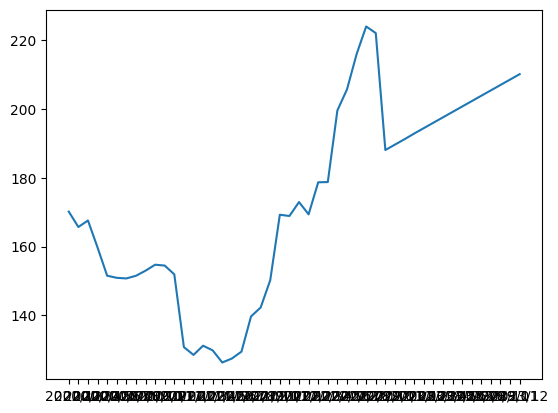

In [18]:
plt.plot(df['YEAR_MONTH'], df['CSU_AVG_PRICE'])
plt.show()